<a href="https://colab.research.google.com/github/GhassenSmaoui/Wine_dataset/blob/master/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:

import io

titanic_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
titanic_train.head()

#continuous_features = df2[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 

 


In [0]:
import pandas as pd
wine_data = pd.read_csv('wine.csv', sep = ';') 
wine_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
wine_data['Column1']-=1

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # the preprocessing module is used in the below cell to scale the data (normalize it )

TensorFlow 2.x selected.


In [0]:
#from sklearn.utils import shuffle
#wine_data = shuffle(wine_data)

In [0]:
wine_data = wine_data.reindex(np.random.permutation(wine_data.index))

In [0]:
wine_data.reset_index(inplace=True, drop=True) 

In [0]:
wine_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
1,2,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
2,2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
3,2,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
4,0,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080


In [0]:
Y = tf.keras.utils.to_categorical(wine_data['Column1'])

In [0]:
wine_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
1,2,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
2,2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
3,2,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
4,0,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080


In [0]:


wine_data.drop( ['Column1'], axis = 1, inplace= True)

In [0]:
wine_data.head()

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
1,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
2,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
3,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
4,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080


In [0]:
X_train, X_test , Y_train , Y_test = train_test_split(wine_data, Y, random_state = 0)

In [0]:
Y[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 11, input_shape = [13], activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(10, input_shape = [11], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(9, input_shape = [10], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [9], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(3, input_shape = [8], activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy'
             )

In [0]:
#model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
history = model.fit(X_train, Y_train, epochs=1000,  verbose=False)
print("Finished training the model")

Finished training the model


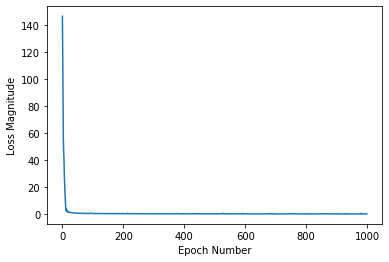

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


In [0]:
 train_prediction = model.predict(X_train)
 train_prediction_integer = np.zeros(train_prediction.shape, dtype=int)

In [0]:
for i in range(train_prediction.shape[0]):
  train_prediction_integer[i,np.argmax(train_prediction[i])] = 1

In [0]:
inc = 0
for i in range(Y_train.shape[0]):
  if np.array_equal(Y_train[i], train_prediction_integer[i]):
    inc +=1
performance_value = (inc /Y_train.shape[0])*100
print (performance_value) 

95.48872180451127


In [0]:
!pwd

/content


In [0]:
 test_prediction = model.predict(X_test)
 test_prediction_integer = np.zeros(test_prediction.shape, dtype=int)

In [0]:
for i in range(test_prediction.shape[0]):
  test_prediction_integer[i,np.argmax(test_prediction[i])] = 1

In [0]:
inc = 0
for i in range(Y_test.shape[0]):
  if np.array_equal(Y_test[i], test_prediction_integer[i]):
    inc +=1
test_performance_value = (inc /Y_test.shape[0])*100
print (test_performance_value) 

93.33333333333333


# Nouvelle section

# Nouvelle section